In [1]:
%matplotlib inline

# Boilerplate code: set up the environment
import matplotlib
import matplotlib.pyplot as plt
import pandas
import scipy
import seaborn
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#cc33cc',
          '#fb9a99', '#e31a1c', '#fdbf6f']
matplotlib.rcParams['savefig.dpi'] = 300
seaborn.set_context({"figure.figsize": (15, 10)})

In [2]:
def load_and_prep(filename, specieslist, index='Species'):
    """Boilerplate code: load data into memory"""
    dataframe = pandas.read_table(filename)
    df = dataframe[dataframe[index].isin(specieslist)]
    df = df.set_index([index]).reindex(specieslist)
    return df

In [3]:
def make_barplot(dataframe, xlab=None, ylab=None, ylim=None, lloc=2,
                 legend=True, yticks=None, yticklabs=None):
    """Biolerplate code: make a pretty barplot"""

    plot = dataframe.plot(kind='bar', stacked=True, figsize=(15, 10),
                          fontsize=16, rot=0, color=colors)
    seaborn.despine(left=True)
    if legend is True:
        _ = plot.legend(loc=lloc, prop={'size': 16})
    if xlab is not None:
        _ = plt.xlabel(xlab)
    if ylab is not None:
        _ = plt.ylabel(ylab)
    if ylim is not None:
        _ = plot.set_ylim(ylim[0], ylim[1])
    if yticks:
        _ = plot.set_yticks(yticks)
    if yticklabs:
        _ = plot.set_yticklabels(yticklabs)
    _ = plot.yaxis.label.set_fontsize(18)

In [4]:
def calc_rho(species, basedir='data'):
    """
    Calculate \rho, the proportion of iiLocus length to giLocus length, for a particular genome.
    """
    files = ['{}/{}/{}.iloci.tsv'.format(basedir, s, s) for s in species]
    data = pandas.concat([pandas.read_table(f) for f in files])
    giloci = data.loc[data.LocusClass.isin(['siLocus', 'ciLocus', 'niLocus'])]
    iiloci = data.loc[data.LocusClass.isin(['iiLocus'])]
    quant = list(giloci['Length'].quantile([0.05, 0.95]))
    giloci_q = giloci.loc[(giloci.Length >= quant[0]) & (giloci.Length <= quant[1])]
    quant = list(iiloci['Length'].quantile([0.05, 0.95]))
    iiloci_q = iiloci.loc[(iiloci.Length >= quant[0]) & (iiloci.Length <= quant[1])]
    rho = iiloci_q['Length'].mean() / giloci_q['Length'].mean()
    return rho

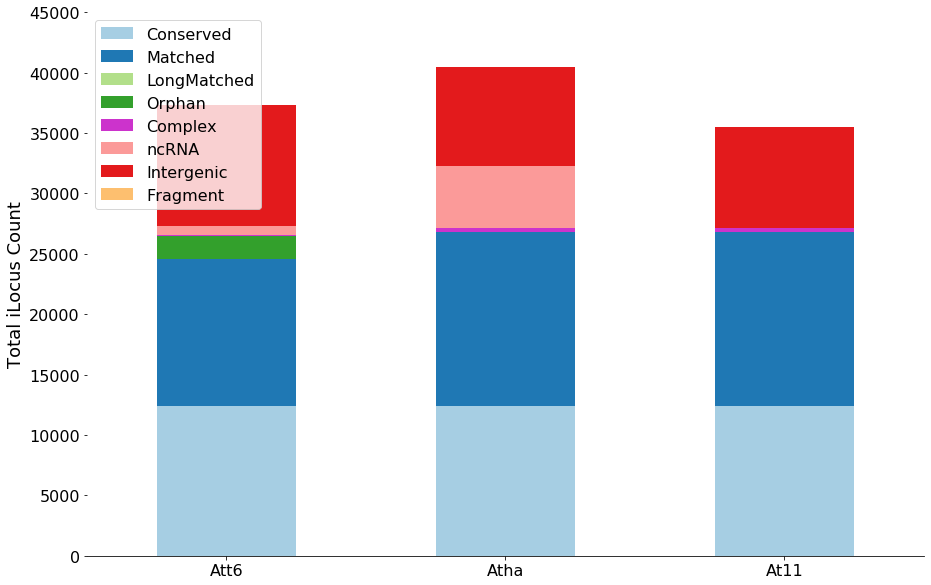

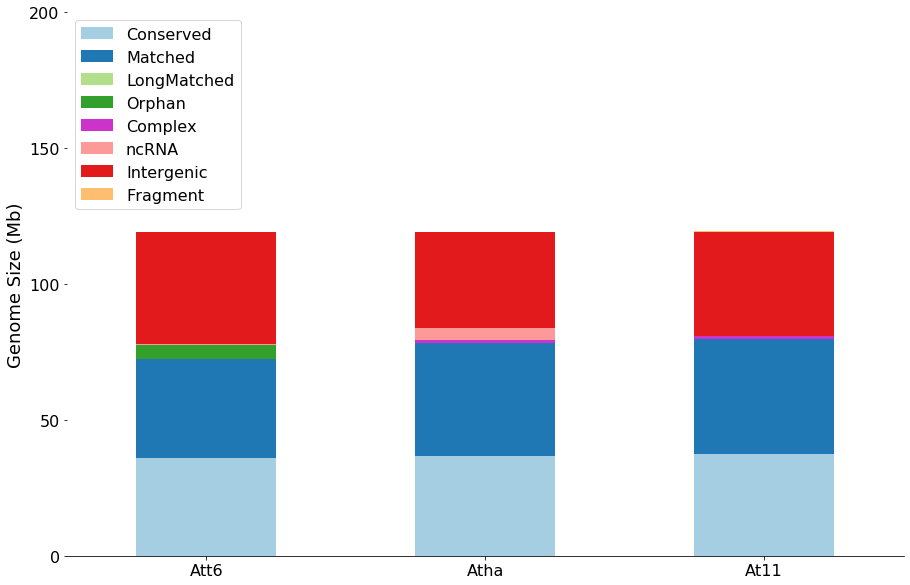

In [9]:
# Now, the actual procedure
specieslist = ['Att6','Atha','At11']
bd_bp = load_and_prep('At_breakdown-bp.tsv', specieslist)
bd_counts = load_and_prep('At_breakdown-counts.tsv', specieslist)
make_barplot(bd_counts, xlab='', ylim=(0, 4.5e4),
             ylab='Total iLocus Count')
make_barplot(bd_bp, xlab='', ylim=(0, 2e8),
             yticks=[5e7 * x for x in [0,1,2,3,4]],
             yticklabs=['0', '50', '100', '150', '200'],
             ylab='Genome Size (Mb)')